In [1]:
import sys
from pathlib import Path

current_dir = Path('.')
current_dir = current_dir.absolute()
root_dir = current_dir.parent.parent
src_dir = root_dir / 'src'

sys.path.append(str(src_dir))

%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
load_dotenv(str(src_dir / '.env'))

True

In [2]:
from api.containers import analyze_container

analyze = analyze_container.service()
df = analyze.collect_all()
df

F:\Projects\hltv_notebook\src\infra\data_frames\pipeline\matches.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[C.Winner] = winners
F:\Projects\hltv_notebook\src\infra\data_frames\pipeline\matches.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_df.rename(columns=dict(zip(part, new_columns)), inplace=True)
F:\Projects\hltv_notebook\src\infra\data_frames\pipeline\matches.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Team,Score,Map,Opponent,Opponent Score,Date,Event,Is Winner
0,Budapest Five,5,inf Inferno,Katuna,16,26/2/23,CCT South Europe Series 3,False
1,Katuna,14,anc Ancient,Budapest Five,16,26/2/23,CCT South Europe Series 3,False
2,Budapest Five,12,ovp Overpass,Katuna,16,26/2/23,CCT South Europe Series 3,False
3,ECSTATIC,14,inf Inferno,Astralis Talent,16,26/2/23,CCT North Europe Series 4 Closed Qualifier,False
4,Eternal Fire,15,ovp Overpass,fnatic,19,26/2/23,ESL Pro League Season 17,False
...,...,...,...,...,...,...,...,...
50715,Virtus.pro,7,ovp Overpass,Spirit,16,29/6/21,StarLadder CIS RMR 2021,False
50716,Virtus.pro,13,d2 Dust2,Spirit,16,29/6/21,StarLadder CIS RMR 2021,False
50717,Virtus.pro,16,inf Inferno,Spirit,11,29/6/21,StarLadder CIS RMR 2021,True
50718,Gambit,16,d2 Dust2,FORZE,6,29/6/21,StarLadder CIS RMR 2021,True


In [3]:
df.dtypes

Team              object
Score              int32
Map               object
Opponent          object
Opponent Score     int32
Date              object
Event             object
Is Winner           bool
dtype: object

In [17]:
import pandas as pd

# Calculate the total score, number of matches, win rate, and map pool for each team
team_scores = df.groupby('Team')['Score'].sum()
team_matches = df.groupby('Team').size()
team_wins = df.groupby('Team')['Is Winner'].sum()
team_win_rate = (team_wins / team_matches) * 100
team_map_pool = df.groupby('Team')['Map'].nunique()
team_average_score = team_scores / team_matches


# Create a DataFrame with the calculated values
team_summary = pd.DataFrame({
    'Score': team_scores,
    'Matches': team_matches,
    'Wins': team_wins,
    'Win Rate': team_win_rate,
    'Average Score': team_average_score,
    'Map Pool': team_map_pool,
})

# Filter out teams with less than 40 matches and sort by win rate in descending order
team_summary = team_summary[team_summary['Matches'] > 25].sort_values('Win Rate', ascending=False)
team_summary

,Score,Matches,Wins,Win Rate,Average Score,Map Pool
Team,,,,,,
VOYVODA,691,43,37,86.046512,16.069767,6
Extra Salt,2378,158,116,73.417722,15.050633,7
Nigma Galaxy,548,39,28,71.794872,14.051282,7
Grayhound,704,50,35,70.000000,14.080000,7
FURIA fe,793,56,39,69.642857,14.160714,8
...,...,...,...,...,...,...
Eternal Fire Academy,722,63,17,26.984127,11.460317,7
Big Chillin,700,64,17,26.562500,10.937500,7
Los Grandes Academy,425,38,10,26.315789,11.184211,7


In [58]:
# Check most played map
most_played_map = df.groupby('Team')['Map'].agg(lambda x: x.value_counts().index[0])
most_played_map_amount = df.groupby('Team')['Map'].agg(lambda x: x.value_counts().values[0])
team_matches = df.groupby('Team').size()
most_played_map_percentage = (most_played_map_amount / team_matches) * 100

most_played_map_summary = pd.DataFrame({
    'Most played map': most_played_map,
    'Amount': most_played_map_amount,
    'Total': team_matches,
    'Percentage': most_played_map_percentage,
})
most_played_map_summary = most_played_map_summary[most_played_map_summary['Total'] > 50].sort_values('Percentage', ascending=True)
most_played_map_summary

,Most played map,Amount,Total,Percentage
Team,,,,
SINNERS,nuke Nuke,84,465,18.064516
Apeks,inf Inferno,62,341,18.181818
HAVU,nuke Nuke,47,257,18.287938
Anonymo,mrg Mirage,56,306,18.300654
Sprout,vtg Vertigo,78,424,18.396226
...,...,...,...,...
The Union,inf Inferno,34,107,31.775701
Leviatan,inf Inferno,32,100,32.000000
0to100,inf Inferno,17,53,32.075472


In [78]:
import seaborn as sns

sns.set_theme(style="darkgrid")

<Axes: title={'center': 'Map distribution'}, ylabel='Map'>

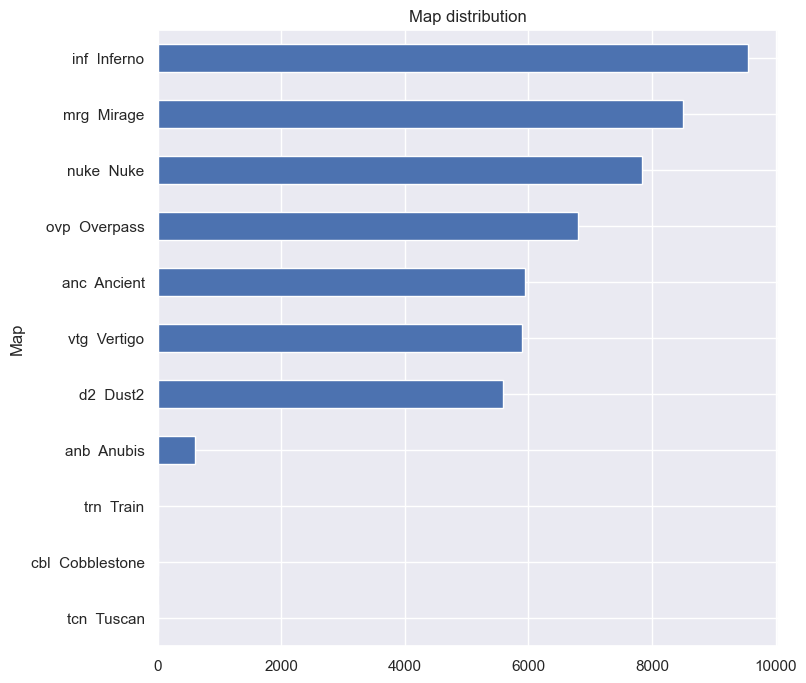

In [87]:
map_group = df.groupby('Map').size()
map_group.sort_values(ascending=True).plot(kind='barh', figsize=(8, 8), title='Map distribution')

<Axes: title={'center': 'Map distribution'}, ylabel='Team'>

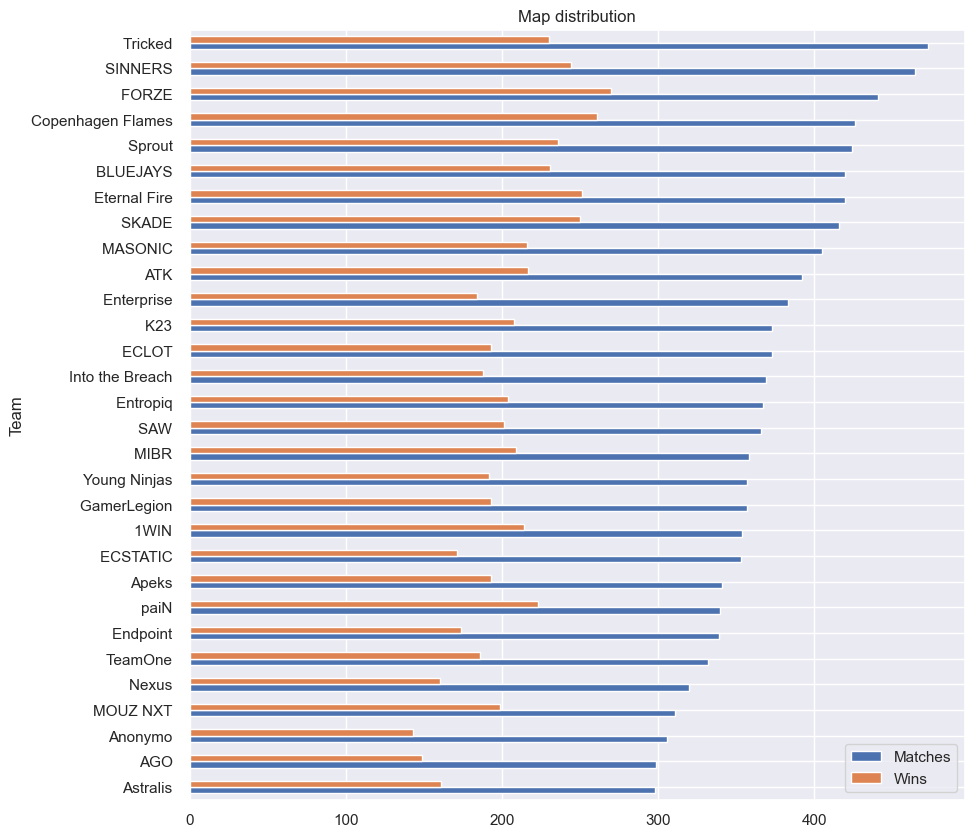

In [93]:
sorted_by_matches = team_summary[['Matches', 'Wins']].sort_values('Matches', ascending=True)

sorted_by_matches[-30:].plot(kind='barh', figsize=(10, 10), title='Map distribution')

<Axes: title={'center': 'Map distribution'}, ylabel='Team'>

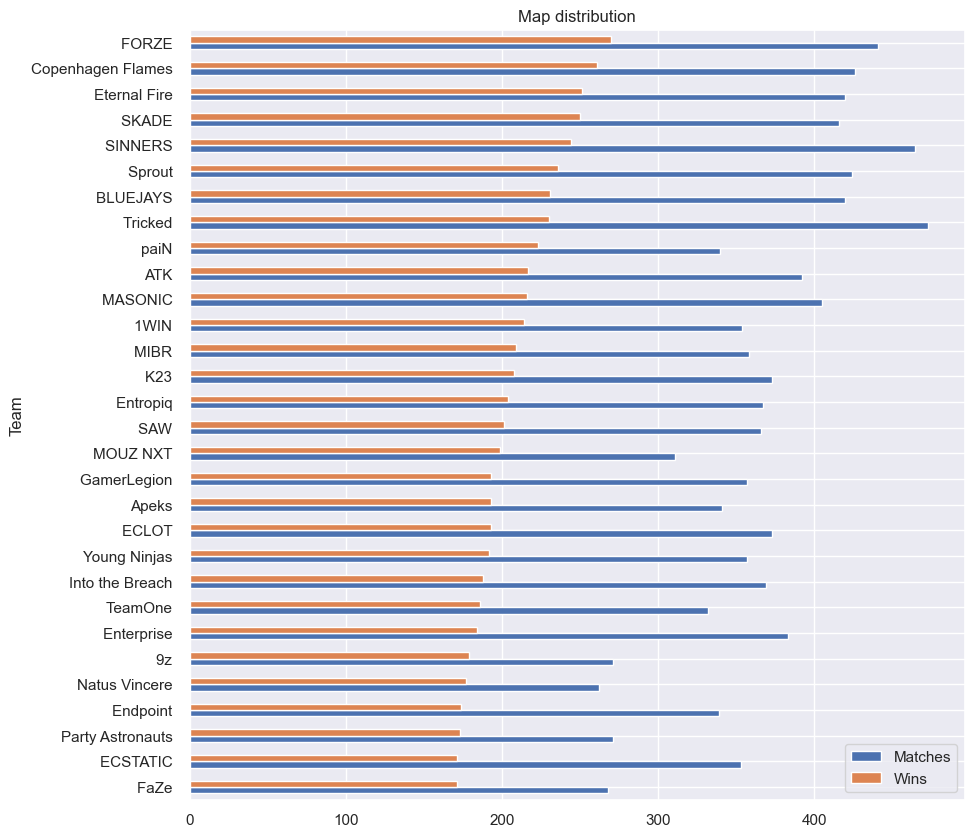

In [97]:
sorted_by_wins = team_summary[['Matches', 'Wins']].sort_values('Wins', ascending=True)

sorted_by_wins[-30:].plot(kind='barh', figsize=(10, 10), title='Map distribution')

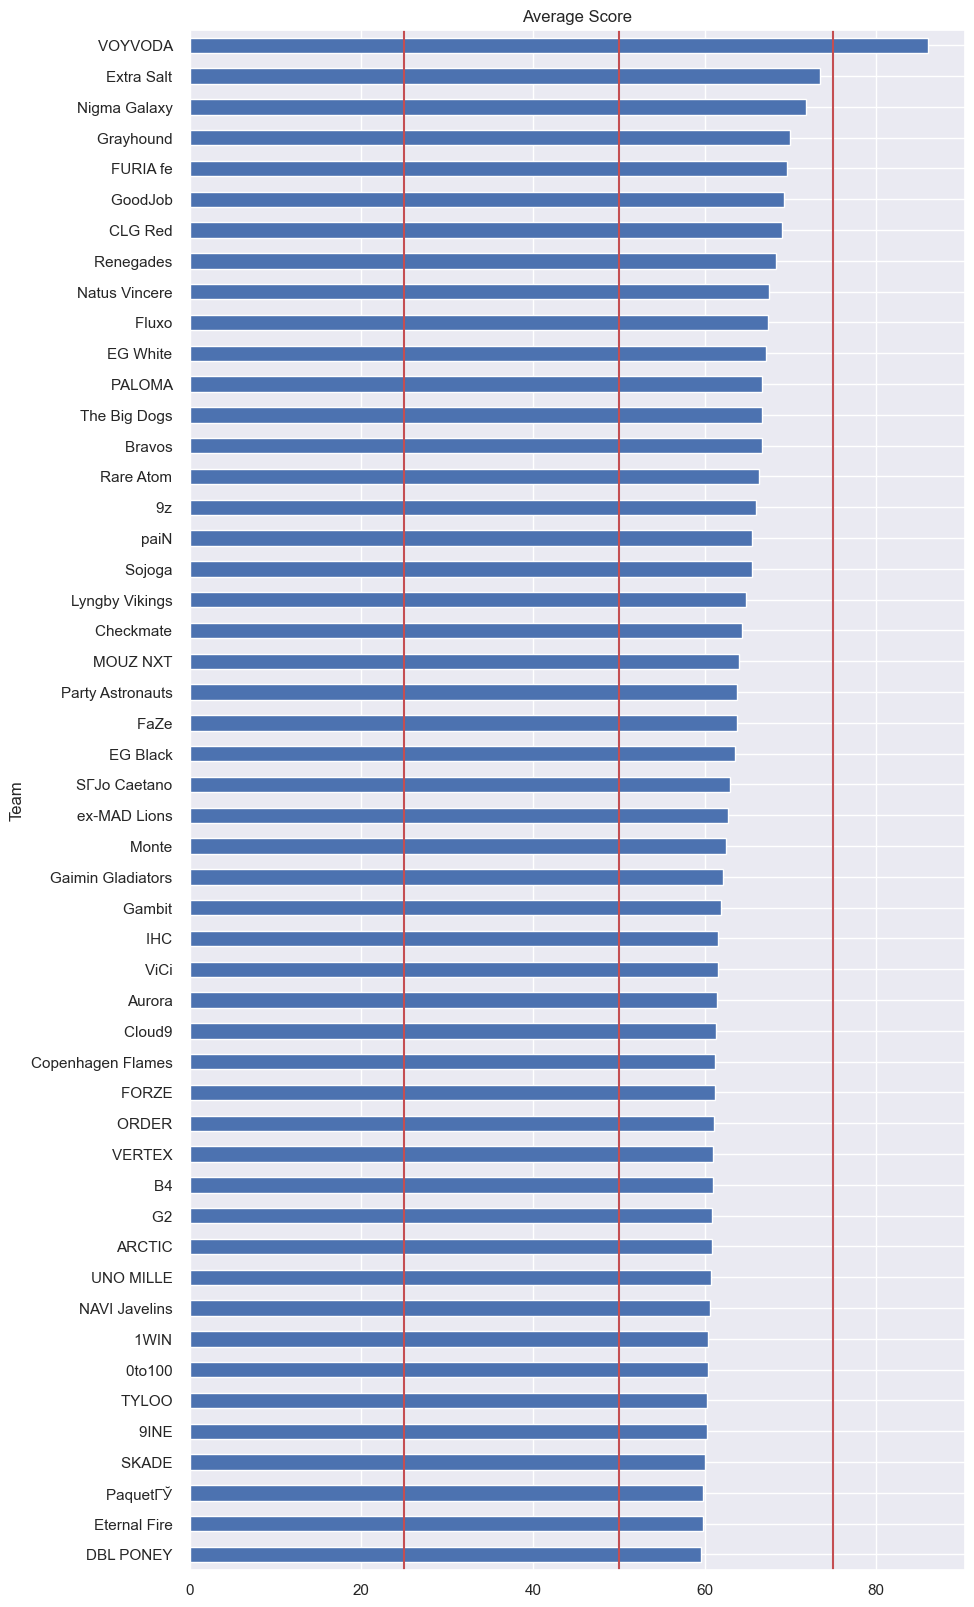

In [112]:
sorted_by_percentage = team_summary['Win Rate'].sort_values(ascending=True)

plt = sorted_by_percentage[-50:].plot(kind='barh', figsize=(10, 20), title='Average Score')
plt.axvline(x=25, color='r')
plt.axvline(x=50, color='r')
plt.axvline(x=75, color='r')